In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('penguins_size.csv')

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
print(df.shape)

(344, 7)


In [7]:
df.describe() 
#bu haliyle sayısal değerleri verir.
#df.describe(include='all') yazarsak tüm veri türlerinde verir.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
df_numeric= df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]

# corr methodunu çağırınca artık her sutunu almaya çalışıyor. sadece numarikleri alması için bir ekleme yapmak gerekiyor.
# df.corr(numeric_only= True)  benim gibi ameleliğe gerek yokmuş. zaten büyük verilerde işlem yaparken kullanılması verimsiz bir yöntem gibi duruyor.

In [9]:
df_numeric.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

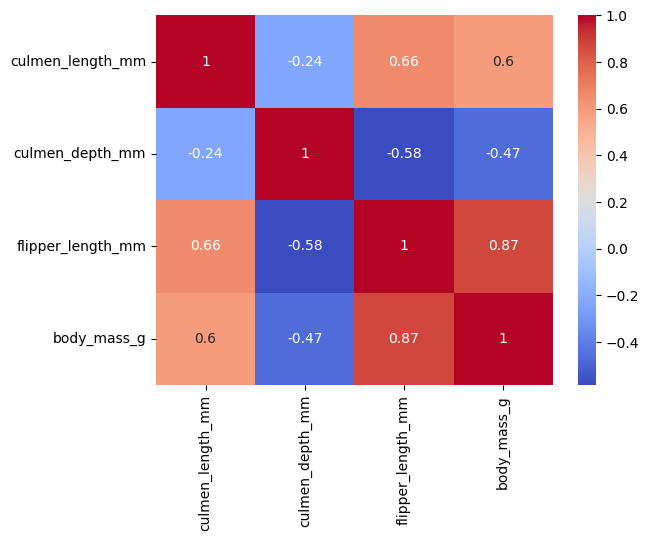

In [11]:
sns.heatmap(df_numeric.corr(),annot=True, cmap='coolwarm')

In [12]:
#sütunlardaki verilerin yüzde kaçı null hesaplama
#(df.isna().mean()*100)
nan_percentage = (df.isna().sum() / df.shape[0]*100)

In [13]:
nan_count =df.isna().sum()
nan_count

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [14]:
nan_table = pd.concat([nan_count, nan_percentage], axis=1)
nan_table.columns= ['count', 'percantage']
nan_table

,count,percantage
species,0,0.000000
island,0,0.000000
culmen_length_mm,2,0.581395
culmen_depth_mm,2,0.581395
flipper_length_mm,2,0.581395
body_mass_g,2,0.581395
sex,10,2.906977


In [15]:
from sklearn.impute import SimpleImputer

In [16]:
imputer = SimpleImputer(strategy='most_frequent')

In [17]:
df.iloc[:,:]= imputer.fit_transform(df)
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [18]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le= LabelEncoder()
df['gender'] = le.fit_transform(df['sex'])
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,MALE,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1


In [21]:
df= df.drop(labels=['sex'], axis=1)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1


In [22]:
species_count = df['species'].value_counts().reset_index()
species_count

,species,count
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


<Axes: xlabel='species', ylabel='count'>

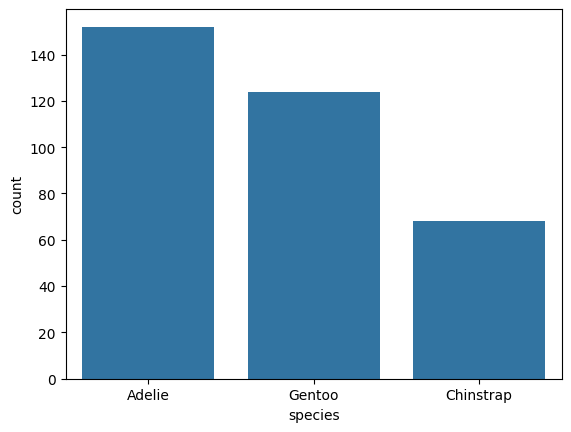

In [23]:
sns.barplot(data=species_count, x='species', y='count')

In [24]:
df[df['species']=='Adelie']['body_mass_g']

0      3750.0
1      3800.0
2      3250.0
3      3800.0
4      3450.0
        ...  
147    3475.0
148    3450.0
149    3750.0
150    3700.0
151    4000.0
Name: body_mass_g, Length: 152, dtype: float64

C:\Users\ahmi_\AppData\Local\Temp\ipykernel_20728\4007892450.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][col], shade=True, label=spec)
C:\Users\ahmi_\AppData\Local\Temp\ipykernel_20728\4007892450.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][col], shade=True, label=spec)
C:\Users\ahmi_\AppData\Local\Temp\ipykernel_20728\4007892450.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][col], shade=True, label=spec)


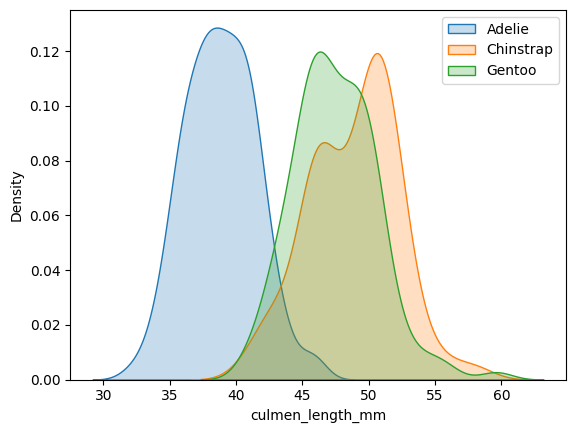

C:\Users\ahmi_\AppData\Local\Temp\ipykernel_20728\4007892450.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][col], shade=True, label=spec)
C:\Users\ahmi_\AppData\Local\Temp\ipykernel_20728\4007892450.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][col], shade=True, label=spec)
C:\Users\ahmi_\AppData\Local\Temp\ipykernel_20728\4007892450.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][col], shade=True, label=spec)


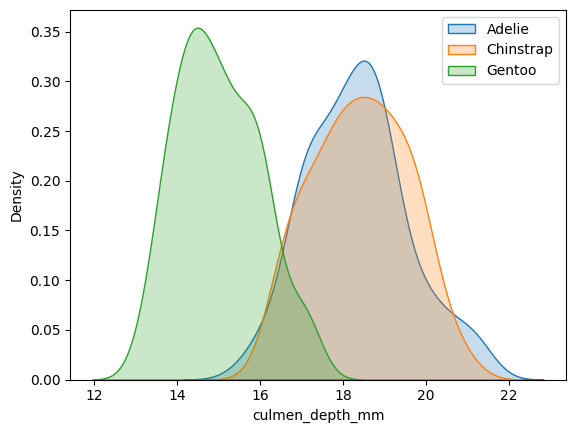

C:\Users\ahmi_\AppData\Local\Temp\ipykernel_20728\4007892450.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][col], shade=True, label=spec)
C:\Users\ahmi_\AppData\Local\Temp\ipykernel_20728\4007892450.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][col], shade=True, label=spec)
C:\Users\ahmi_\AppData\Local\Temp\ipykernel_20728\4007892450.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][col], shade=True, label=spec)


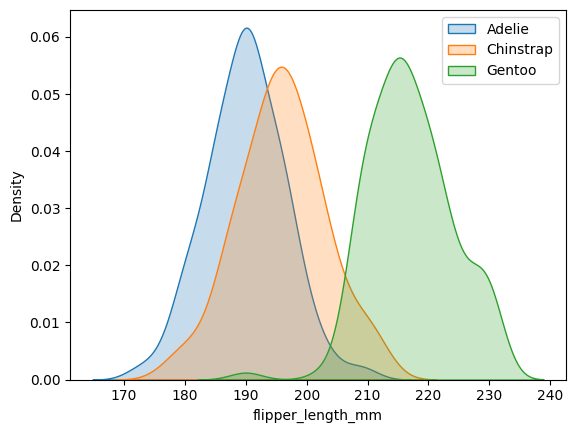

C:\Users\ahmi_\AppData\Local\Temp\ipykernel_20728\4007892450.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][col], shade=True, label=spec)
C:\Users\ahmi_\AppData\Local\Temp\ipykernel_20728\4007892450.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][col], shade=True, label=spec)
C:\Users\ahmi_\AppData\Local\Temp\ipykernel_20728\4007892450.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']==spec][col], shade=True, label=spec)


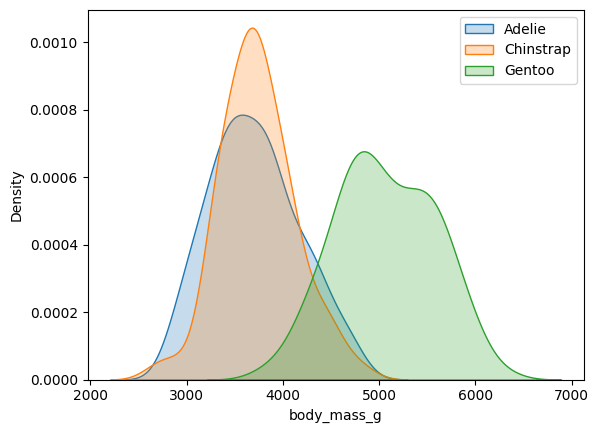

In [25]:
for col in df.columns[2:-1]:    
    for spec in df['species'].unique():
        sns.kdeplot(df[df['species']==spec][col], shade=True, label=spec)
        plt.legend()
    plt.show()    

c:\Users\ahmi_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


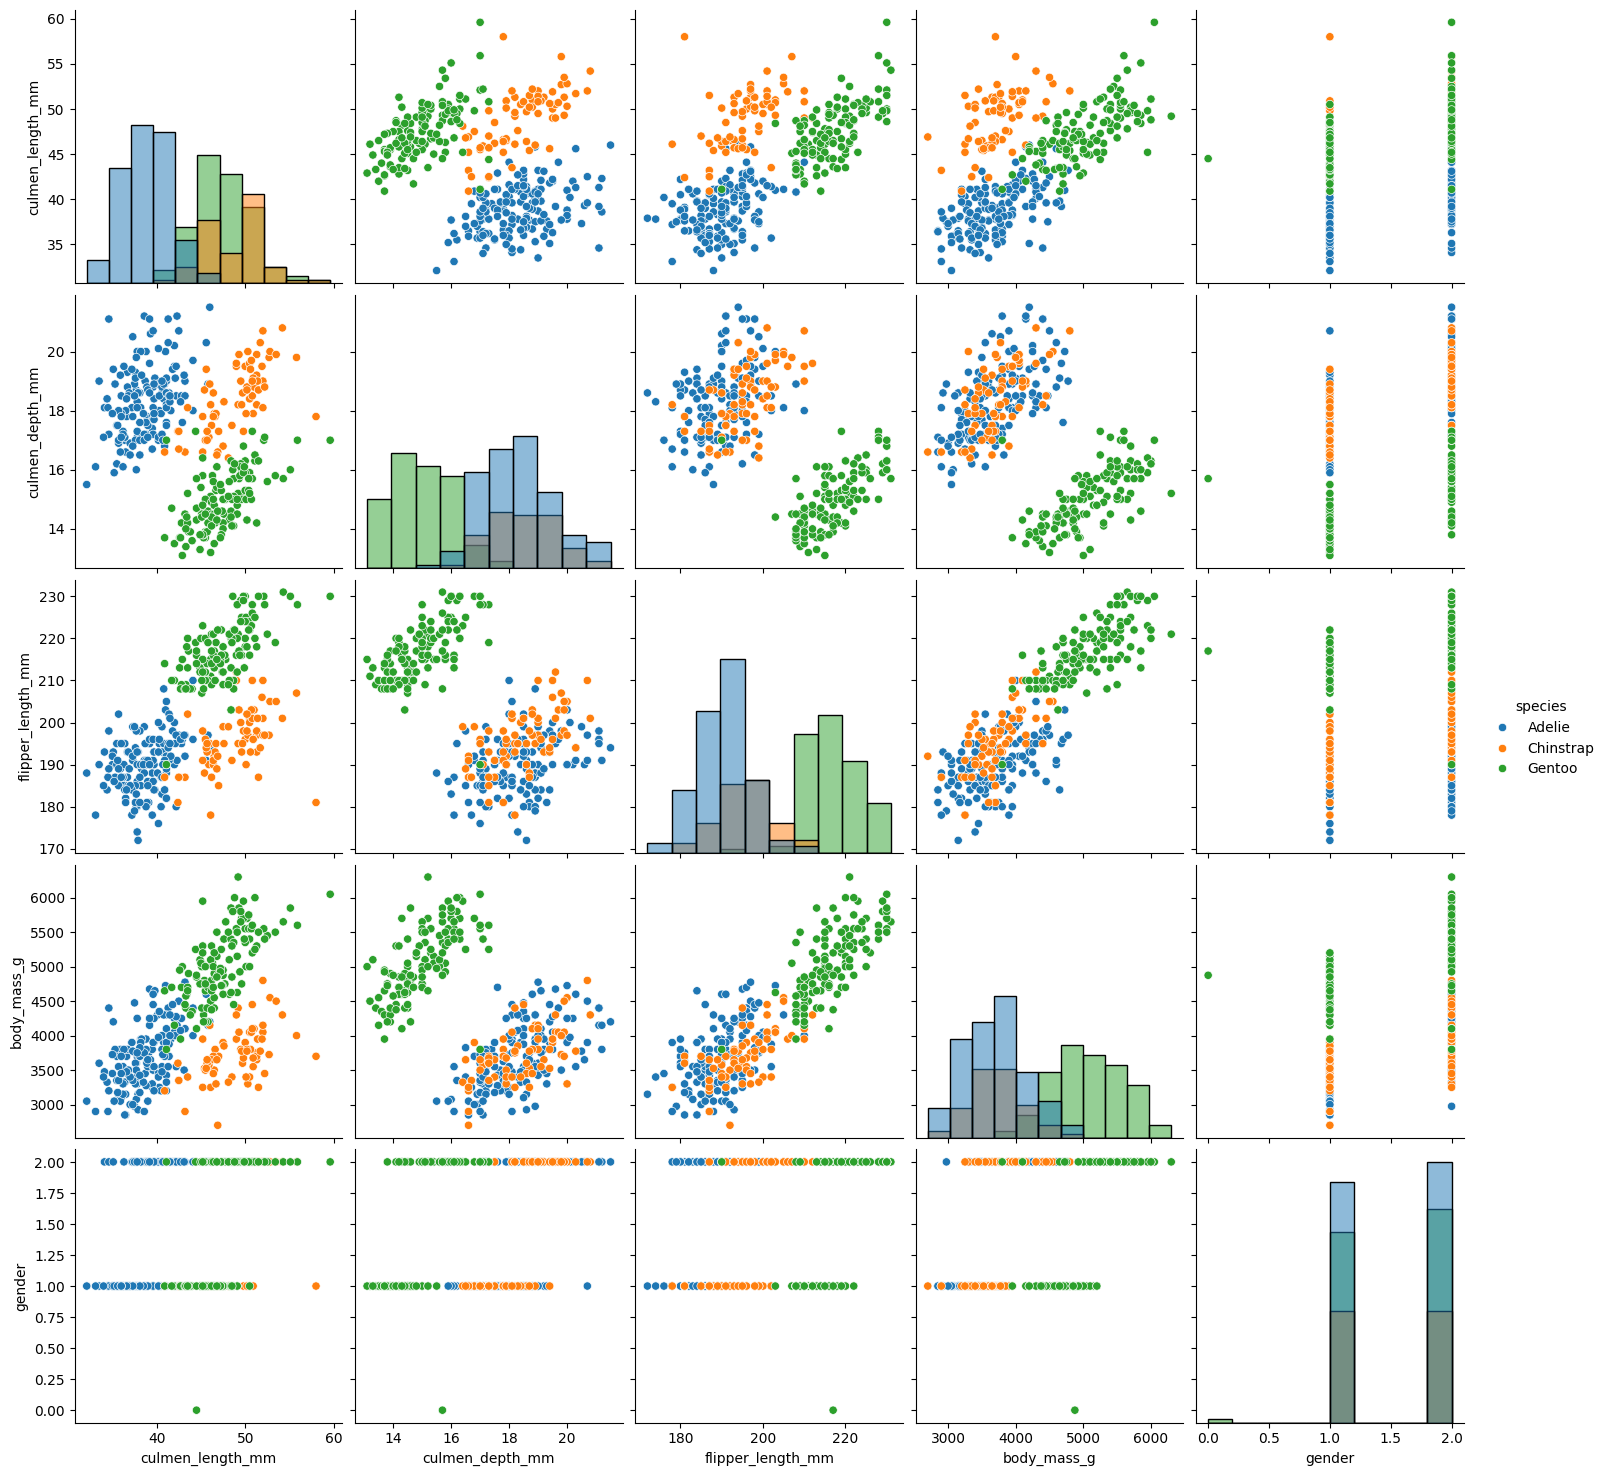

In [26]:
# bi önceki kodun daha kolay hali
sns.pairplot(df, hue='species', size=3, diag_kind='hist')

## Yapay öğrenme

In [27]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1


In [28]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1


In [33]:
island = pd.get_dummies(df[['island']], drop_first=True)
island.head()

,island_Dream,island_Torgersen
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [34]:
pd.concat([df, island], axis=1).drop(['island'], axis=1)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,2,False,True
1,Adelie,39.5,17.4,186.0,3800.0,1,False,True
2,Adelie,40.3,18.0,195.0,3250.0,1,False,True
3,Adelie,41.1,17.0,190.0,3800.0,2,False,True
4,Adelie,36.7,19.3,193.0,3450.0,1,False,True
...,...,...,...,...,...,...,...,...
339,Gentoo,41.1,17.0,190.0,3800.0,2,False,False
340,Gentoo,46.8,14.3,215.0,4850.0,1,False,False
341,Gentoo,50.4,15.7,222.0,5750.0,2,False,False
342,Gentoo,45.2,14.8,212.0,5200.0,1,False,False


In [35]:
df_2 = pd.concat([df, island],axis=1).drop(['island'], axis=1)
df_2.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,2,False,True
1,Adelie,39.5,17.4,186.0,3800.0,1,False,True
2,Adelie,40.3,18.0,195.0,3250.0,1,False,True
3,Adelie,41.1,17.0,190.0,3800.0,2,False,True
4,Adelie,36.7,19.3,193.0,3450.0,1,False,True


In [37]:
target, features = df_2.species, df_2.drop('species',axis=1)
target.shape

(344,)

In [39]:
features.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,2,False,True
1,39.5,17.4,186.0,3800.0,1,False,True
2,40.3,18.0,195.0,3250.0,1,False,True
3,41.1,17.0,190.0,3800.0,2,False,True
4,36.7,19.3,193.0,3450.0,1,False,True


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
scaler.fit(features.iloc[:, :4])
features.iloc[:,:4] = scaler.transform(features.iloc[:,:4])

In [42]:
features

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,island_Dream,island_Torgersen
0,-0.883375,0.788176,-1.415471,-0.562452,2,False,True
1,-0.809845,0.127001,-1.058960,-0.499877,1,False,True
2,-0.662785,0.432159,-0.417242,-1.188208,1,False,True
3,-0.515725,-0.076437,-0.773752,-0.499877,2,False,True
4,-1.324555,1.093334,-0.559846,-0.937906,1,False,True
...,...,...,...,...,...,...,...
339,-0.515725,-0.076437,-0.773752,-0.499877,2,False,False
340,0.532077,-1.449647,1.008800,0.814210,1,False,False
341,1.193847,-0.737612,1.507915,1.940570,2,False,False
342,0.237957,-1.195349,0.794894,1.252239,1,False,False


In [43]:
from sklearn import preprocessing
target_le = preprocessing.LabelEncoder()
target_encoded = target_le.fit_transform(target)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2)
X_train.shape

(275, 7)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
confusion_matrix(y_test,tree.predict(X_test))


array([[27,  1,  0],
       [ 0, 16,  0],
       [ 1,  0, 24]], dtype=int64)

In [47]:
accuracy_score(y_test,tree.predict(X_test))

0.9710144927536232

In [48]:
final_df = pd.concat([features, pd.Series(target_encoded, name='target')], axis=1)
final_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,island_Dream,island_Torgersen,target
0,-0.883375,0.788176,-1.415471,-0.562452,2,False,True,0
1,-0.809845,0.127001,-1.058960,-0.499877,1,False,True,0
2,-0.662785,0.432159,-0.417242,-1.188208,1,False,True,0
3,-0.515725,-0.076437,-0.773752,-0.499877,2,False,True,0
4,-1.324555,1.093334,-0.559846,-0.937906,1,False,True,0
...,...,...,...,...,...,...,...,...
339,-0.515725,-0.076437,-0.773752,-0.499877,2,False,False,2
340,0.532077,-1.449647,1.008800,0.814210,1,False,False,2
341,1.193847,-0.737612,1.507915,1.940570,2,False,False,2
342,0.237957,-1.195349,0.794894,1.252239,1,False,False,2


In [49]:
final_df.to_csv('penguins_size_result.csv', index=False)